In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [2]:
# Import cleaned csv

medical_data = pd.read_csv(r"C:\Users\bower\OneDrive\Desktop\medical_clean.csv")

In [3]:
# Renaming the survey columns

medical_data.rename(columns={"Item1": "Timely_admission", "Item2": "Timely_treatment", "Item3": "Timely_vistis", "Item4": "Reliability", "Item5": "Options", "Item6": "Hours_treatement", "Item7": "Courteous_staff", "Item8": "Active_listening"}, inplace=True)

In [4]:
# The next sevaral rows are getting basic information from my dataset/variables

medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
medical_data['Services'].describe()

count          10000
unique             4
top       Blood Work
freq            5265
Name: Services, dtype: object

In [6]:
medical_data['Services'].unique()

array(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], dtype=object)

In [7]:
medical_data['TotalCharge'].unique()

array([3726.70286 , 4193.190458, 2434.234222, ..., 8276.481   ,
       7644.483   , 7887.553   ])

In [8]:
medical_data['TotalCharge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [9]:
medical_data['TotalCharge'].unique()

array([3726.70286 , 4193.190458, 2434.234222, ..., 8276.481   ,
       7644.483   , 7887.553   ])

<Axes: xlabel='Services', ylabel='TotalCharge'>

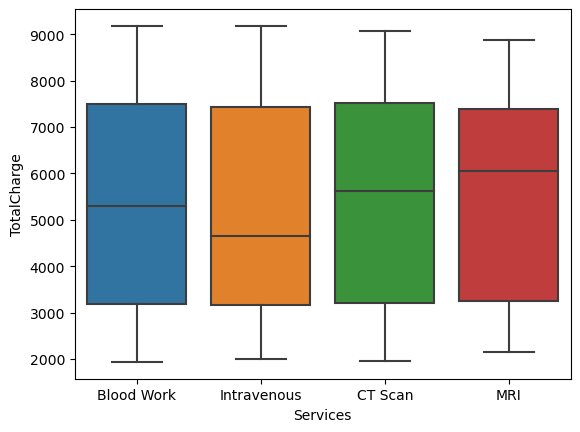

In [10]:
sns.boxplot(x='Services', y='TotalCharge', data=medical_data)

In [11]:
# Code to find f statistic and pvalue

blood_work = medical_data[medical_data.Services == 'Blood Work'].TotalCharge
intravenous = medical_data[medical_data.Services == 'Intravenous'].TotalCharge
ct_scan = medical_data[medical_data.Services == 'CT Scan'].TotalCharge
mri_num = medical_data[medical_data.Services == 'MRI'].TotalCharge

In [12]:
anova = stats.f_oneway(blood_work, intravenous, ct_scan, mri_num)

In [13]:
print(anova)

F_onewayResult(statistic=1.1415697191542395, pvalue=0.3307144993971542)


In [14]:
f_statistic = 1.141569719154239
pvalue = 0.3307144993971542 # Fail to reject the null hypothesis at an alpha level of 0.05

array([[<Axes: title={'center': 'TotalCharge'}>,
        <Axes: title={'center': 'Initial_days'}>]], dtype=object)

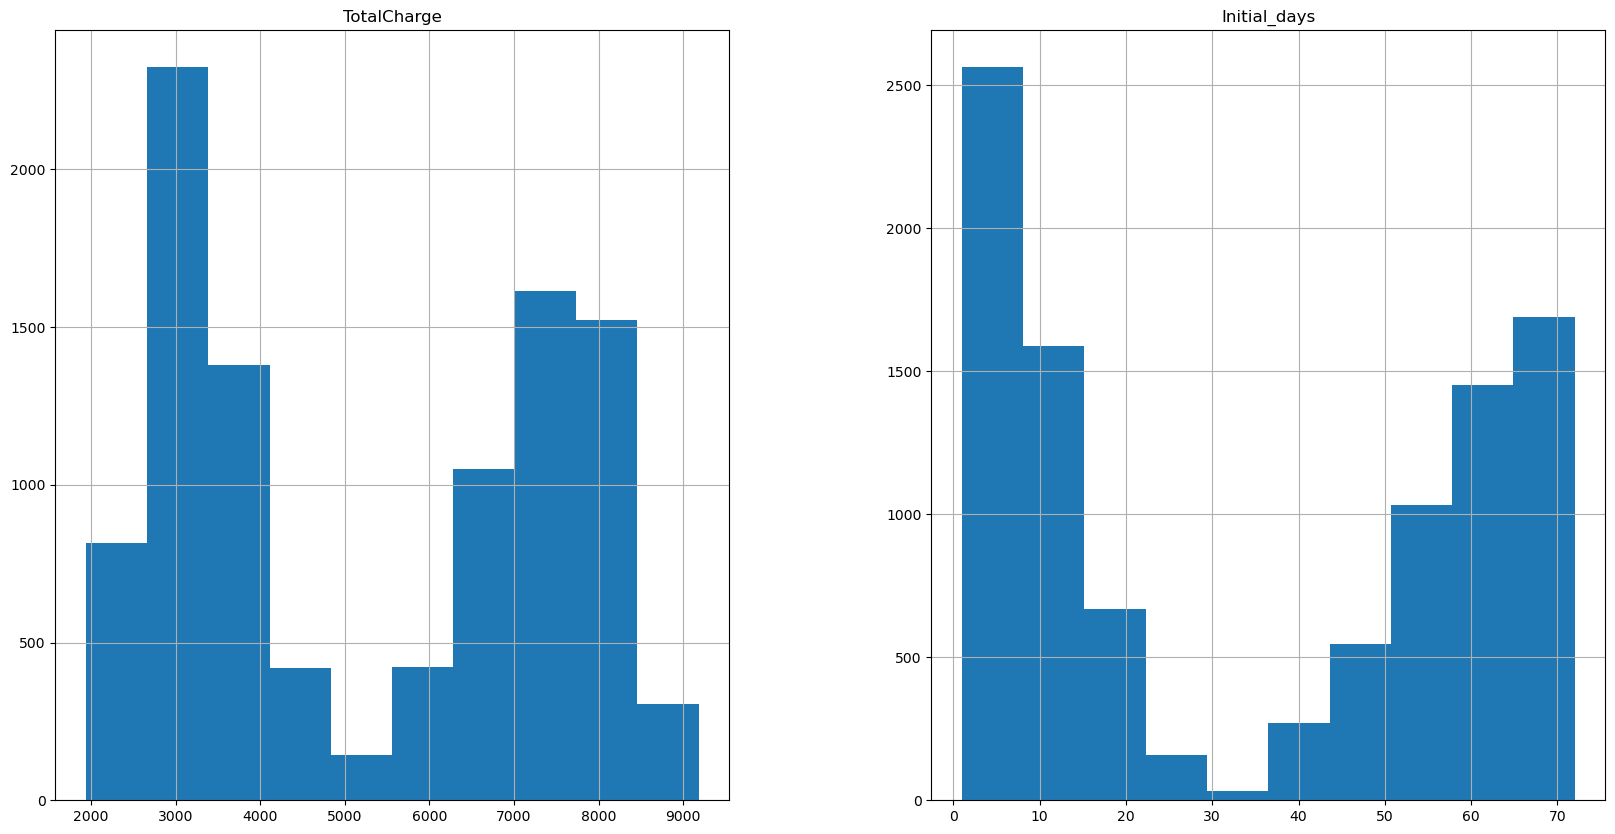

In [15]:
# Univariate of Continuous Variables TotalCharge and Additional_charges

medical_data[['TotalCharge', 'Initial_days']].hist(figsize=(20,10))

In [16]:
medical_data['TotalCharge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [17]:
medical_data['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

<Axes: xlabel='Services', ylabel='Instances'>

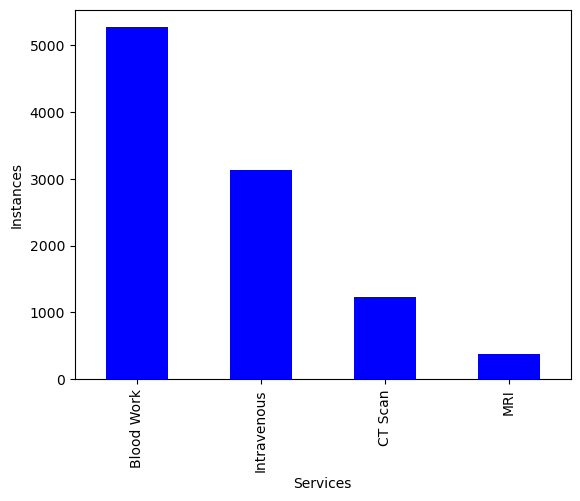

In [18]:
# Univariate of Categorical Variables Services and Initial_admin

medical_data['Services'].value_counts().plot(kind='bar', color="Blue", xlabel='Services', ylabel="Instances")

In [19]:
medical_data['Services'].value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

<Axes: xlabel='Initial Admission', ylabel='Instances'>

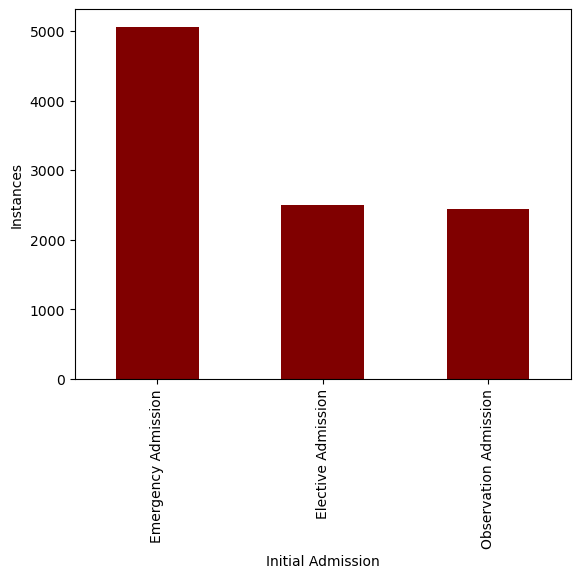

In [20]:
medical_data['Initial_admin'].value_counts().plot(kind='bar', color="maroon", xlabel="Initial Admission", ylabel="Instances")

In [21]:
medical_data['Initial_admin'].value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

<Axes: xlabel='Services', ylabel='Count'>

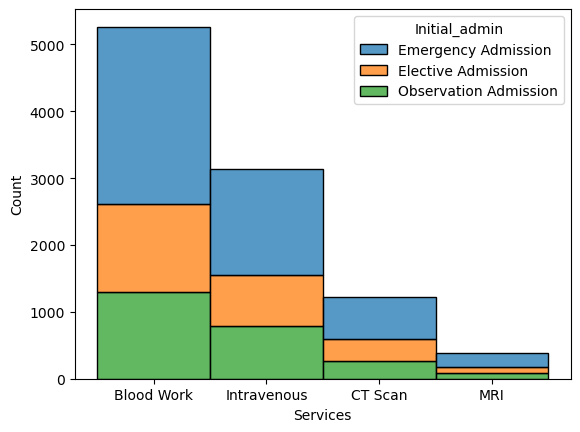

In [22]:
# Stacked bar chart of count of each of initial admissions for each service - bivariate distribution

sns.histplot(binwidth=1, x="Services", hue="Initial_admin", data=medical_data, stat="count", multiple="stack")

In [23]:
# Reclassifying variables for heatmap

medical_data['Services'].replace(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], [0, 1, 2, 3], inplace=True)
medical_data['Initial_admin'].replace(['Emergency Admission', 'Elective Admission', 'Observation Admission'], [0, 1, 2], inplace=True)

In [24]:
# Create a variable for heatmap

bivariate_df = medical_data[['TotalCharge', 'Initial_days', 'Services', 'Initial_admin']]

<Axes: >

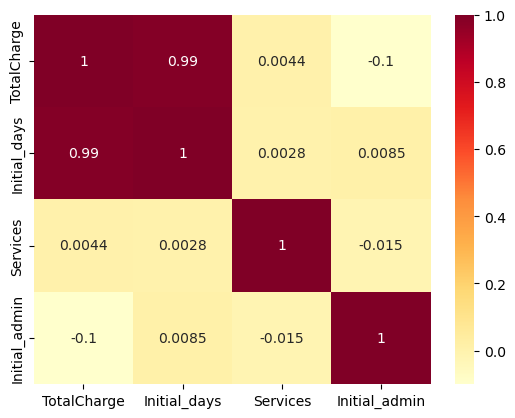

In [25]:
sns.heatmap(bivariate_df.corr(), annot = True, cmap='YlOrRd')

<Axes: xlabel='TotalCharge', ylabel='Initial_days'>

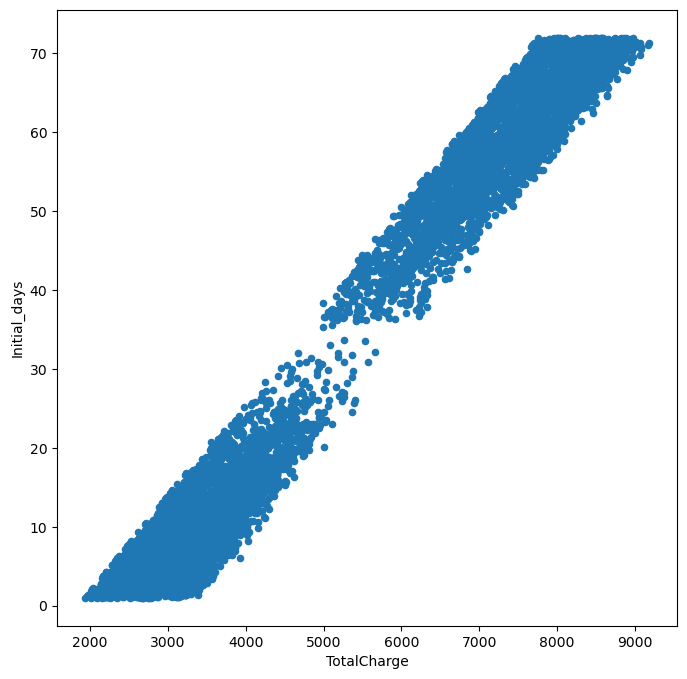

In [26]:
# Scatter plot of TotalCharge and Additional_charges - bivariate distribution

bivariate_df.plot.scatter(x='TotalCharge', y='Initial_days', marker = "o", figsize=(8,8))